# 6.2 Exploring Relationships

This script contains the following:
1. Importing Visualization Libraries and Data
2. Adding new features by creating new columns
3. Exploring Relationships
 Correlations
 Scatterplots
 Pair Plots
 Categorical Plots
4. Questions and Answers
5. Hypothesis
6. Exporting Data

### 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Define path
path= r'C:\Users\mojis\Documents\11-2022-Gun violence Analysis'

In [3]:
# Import data

df = pd.read_pickle(os.path.join(path, '02-Data','Prepared data', 'gun_violence_clean_data.pkl'))

#### Checking Data

In [4]:
df.head()

incident_id        date           state city_or_county  n_killed  n_injured  \
0      461105  2013-01-01    Pennsylvania     Mckeesport         0          4   
1      460726  2013-01-01      California      Hawthorne         1          3   
2      478855  2013-01-01            Ohio         Lorain         1          3   
3      478925  2013-01-05        Colorado         Aurora         4          0   
4      478959  2013-01-07  North Carolina     Greensboro         2          2   

   latitude  longitude  n_guns_involved  
0   40.3467   -79.8559              NaN  
1   33.9090  -118.3330              NaN  
2   41.4455   -82.1377              2.0  
3   39.6518  -104.8020              NaN  
4   36.1140   -79.9569              2.0

In [5]:
df.shape

(239677, 9)

### 2. Adding new features by creating new columns

In [6]:
# Create some additional features
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['monthday'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday
df['n_shot'] = df['n_killed'] + df['n_injured']

In [7]:
df.head(30)

incident_id       date                 state    city_or_county  n_killed  \
0       461105 2013-01-01          Pennsylvania        Mckeesport         0   
1       460726 2013-01-01            California         Hawthorne         1   
2       478855 2013-01-01                  Ohio            Lorain         1   
3       478925 2013-01-05              Colorado            Aurora         4   
4       478959 2013-01-07        North Carolina        Greensboro         2   
5       478948 2013-01-07              Oklahoma             Tulsa         4   
6       479363 2013-01-19            New Mexico       Albuquerque         5   
7       479374 2013-01-21             Louisiana       New Orleans         0   
8       479389 2013-01-21            California         Brentwood         0   
9       492151 2013-01-23              Maryland         Baltimore         1   
10      491674 2013-01-23             Tennessee       Chattanooga         1   
11      479413 2013-01-25              Missouri       Saint Louis         1   
12      479561 2013-01-26             Louisiana         Charenton         2   
13      479554 2013-01-26  District of Columbia        Washington         0   
14      479460 2013-01-26                  Ohio       Springfield         1   
15      479573 2013-02-02             Tennessee           Memphis         0   
16      479580 2013-02-03            California     Yuba (county)         1   
17      479592 2013-02-07              Illinois           Chicago         0   
18      479603 2013-02-09             Louisiana       New Orleans         0   
19      480311 2013-02-11            California           Vallejo         1   
20      480327 2013-02-11              Delaware        Wilmington         3   
21      480344 2013-02-12                  Utah           Midvale         4   
22      480358 2013-02-19            California   Orange (county)         4   
23      480383 2013-02-21              Oklahoma             Tulsa         1   
24      480401 2013-02-22              Michigan      Grand Rapids         0   
25      480407 2013-02-23            California         Lancaster         0   
26      480443 2013-02-24               Georgia             Macon         0   
27      481186 2013-03-02             Louisiana        Shreveport         1   
28      481198 2013-03-03               Georgia          Moultrie         2   
29      481208 2013-03-03              Michigan  Saginaw (county)         0   

    n_injured  latitude  longitude  n_guns_involved  year  month  monthday  \
0           4   40.3467   -79.8559              NaN  2013      1         1   
1           3   33.9090  -118.3330              NaN  2013      1         1   
2           3   41.4455   -82.1377              2.0  2013      1         1   
3           0   39.6518  -104.8020              NaN  2013      1         5   
4           2   36.1140   -79.9569              2.0  2013      1         7   
5           0   36.2405   -95.9768              NaN  2013      1         7   
6           0   34.9791  -106.7160              2.0  2013      1        19   
7           5   29.9435   -90.0836              NaN  2013      1        21   
8           4   37.9656  -121.7180              NaN  2013      1        21   
9           6   39.2899   -76.6412              NaN  2013      1        23   
10          3   35.0221   -85.2697              1.0  2013      1        23   
11          3   38.7067   -90.2494              1.0  2013      1        25   
12          3   29.8816   -91.5251              1.0  2013      1        26   
13          5   38.8978   -76.9717              1.0  2013      1        26   
14          3   39.9252   -83.8218              NaN  2013      1        26   
15          5   35.0803   -89.8871              1.0  2013      2         2   
16          3   39.1236  -121.5830              1.0  2013      2         3   
17          4   41.7592   -87.5628              NaN  2013      2         7   
18          4   29.9563   -90.0676              1.0  2013      2       

In [8]:
df.shape

(239677, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   incident_id      239677 non-null  object        
 1   date             239677 non-null  datetime64[ns]
 2   state            239677 non-null  object        
 3   city_or_county   239677 non-null  object        
 4   n_killed         239677 non-null  int64         
 5   n_injured        239677 non-null  int64         
 6   latitude         231754 non-null  float64       
 7   longitude        231754 non-null  float64       
 8   n_guns_involved  140226 non-null  float64       
 9   year             239677 non-null  int64         
 10  month            239677 non-null  int64         
 11  monthday         239677 non-null  int64         
 12  weekday          239677 non-null  int64         
 13  n_shot           239677 non-null  int64         
dtypes: datetime64[ns](1)

### 2. Exploring Relationships

#### subset

In [10]:
# creating subset excluding categorical variables
sub = df[['n_killed', 'n_injured','latitude', 'longitude', 'n_guns_involved','n_shot']]

In [11]:
sub

n_killed  n_injured  latitude  longitude  n_guns_involved  n_shot
0              0          4   40.3467   -79.8559              NaN       4
1              1          3   33.9090  -118.3330              NaN       4
2              1          3   41.4455   -82.1377              2.0       4
3              4          0   39.6518  -104.8020              NaN       4
4              2          2   36.1140   -79.9569              2.0       4
...          ...        ...       ...        ...              ...     ...
239672         0          0       NaN        NaN              1.0       0
239673         1          0   31.7537   -93.0836              1.0       1
239674         0          1   29.9239   -90.0442              1.0       1
239675         1          0   29.7201   -95.6110              1.0       1
239676         2          0   44.7293   -69.7691              2.0       2

[239677 rows x 6 columns]

#### Correlation

In [12]:
# Create a correlation matrix using pandas

sub.corr()

n_killed  n_injured  latitude  longitude  n_guns_involved  \
n_killed         1.000000  -0.125425 -0.080078  -0.062149        -0.028200   
n_injured       -0.125425   1.000000 -0.011379   0.036962        -0.038843   
latitude        -0.080078  -0.011379  1.000000  -0.056713        -0.001341   
longitude       -0.062149   0.036962 -0.056713   1.000000        -0.016107   
n_guns_involved -0.028200  -0.038843 -0.001341  -0.016107         1.000000   
n_shot           0.510748   0.788881 -0.059053  -0.006185        -0.049551   

                   n_shot  
n_killed         0.510748  
n_injured        0.788881  
latitude        -0.059053  
longitude       -0.006185  
n_guns_involved -0.049551  
n_shot           1.000000

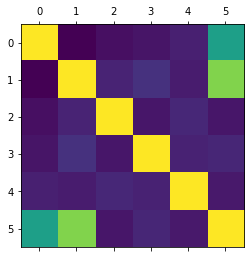

In [13]:
# Create a correlation heatmap using matplotlib and Save figure
plt.matshow(sub.corr())
plt.savefig("out.png") 

Text(0.5, 1.0, 'Gun Violence Correlation Matrix')

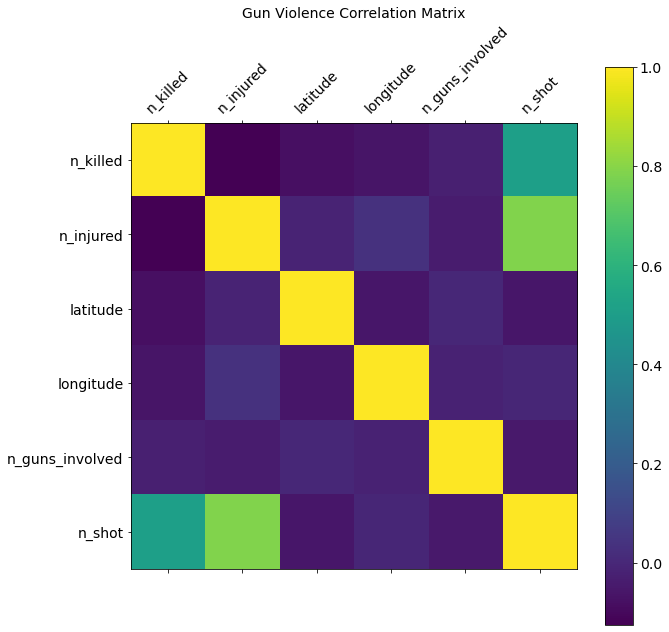

In [14]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(10, 10)) # figure size 
plt.matshow(sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub.shape[1]), sub.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(sub.shape[1]), sub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Gun Violence Correlation Matrix', fontsize=14) # add title

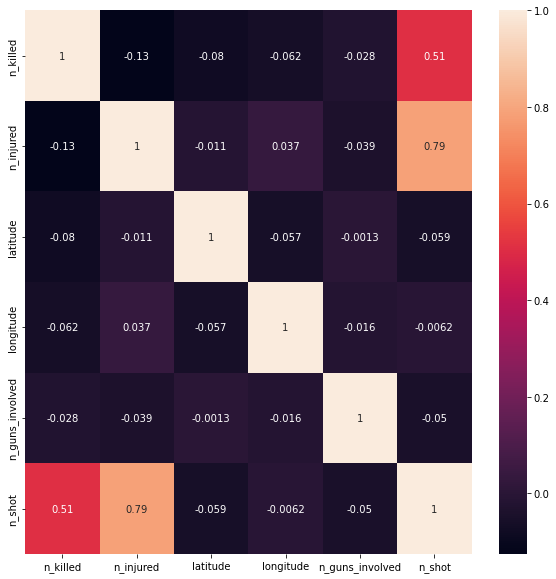

In [15]:
# creating subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# corelation heatmap in seaborn
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

There is a very weak negative relationship between n_injured and n_killed (-0.13). The only positive relationship is between n_shot to n_killed and n_injured. n-shot and n_killed has a moderate positive relationship with a correlation of 0.51 while n_shot to n_injured has a strong positive relationship with a correlation of 0.79. There is no relationship that exist between number of guns involveld to number shot, number killed and number injured.

#### Scaterplot

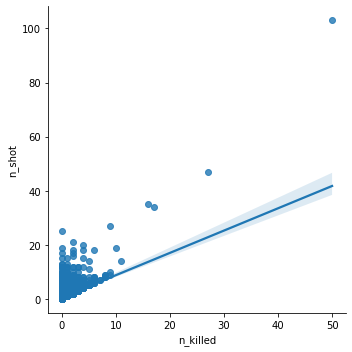

In [16]:
# Create a scatterplot for the "n_shot" and "n_killed" columns in seaborn

sns.lmplot(x = 'n_killed', y = 'n_shot', data = df)

There is a positive relationship between these two columns. It make sense to see that in the more number of people shot there's a likelyhood we see increase in number of people killed.

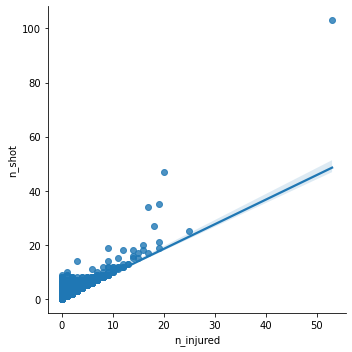

In [17]:
# Create a scatterplot for the "n_shot" and "n_injured" columns in seaborn

sns.lmplot(x = 'n_injured', y = 'n_shot', data = df)

There is a strong positive relationship between these two columns as it is similar to the one above. With increase in the number of people shot, we see increase in number of people injured.

#### Pair plot

In [18]:
# Keep only the variables I want to use in the pair plot
sub_2 = df[['n_killed', 'n_injured','n_shot','year','weekday']]

In [19]:
sub_2

n_killed  n_injured  n_shot  year  weekday
0              0          4       4  2013        1
1              1          3       4  2013        1
2              1          3       4  2013        1
3              4          0       4  2013        5
4              2          2       4  2013        0
...          ...        ...     ...   ...      ...
239672         0          0       0  2018        5
239673         1          0       1  2018        5
239674         0          1       1  2018        5
239675         1          0       1  2018        5
239676         2          0       2  2018        5

[239677 rows x 5 columns]

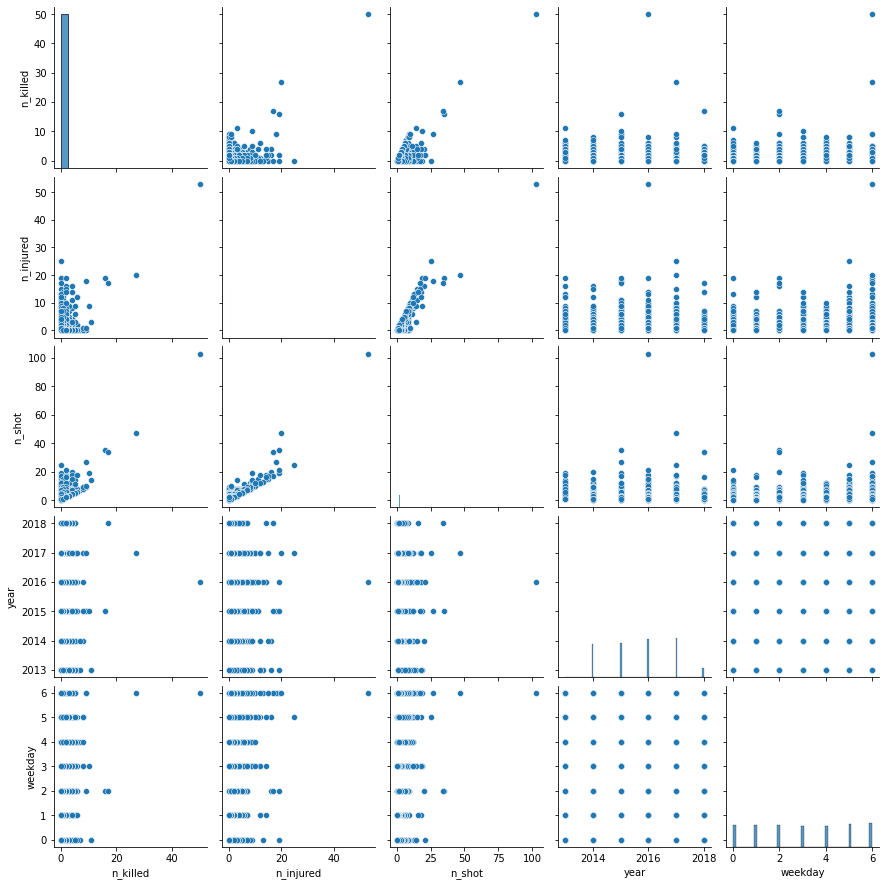

In [20]:
# Create a pair plot 

g = sns.pairplot(sub_2)

The is a closer relationship between number of people shot and number of people injured, and also between Number of people shot and number of people killed.

#### Categorical plots

##### Creating a categorical variable that splits the "n_shot"(number of people shot(number of people killed + number of people injured) column into categories

<AxesSubplot:xlabel='n_shot', ylabel='Count'>

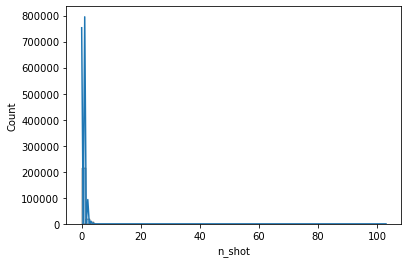

In [21]:
# creating a histogram of n_shot(number of people shot) to visualize the distribution
sns.histplot(df['n_shot'], bins = 75, kde = True)

In [22]:
# creating number of people shot categories
df.loc[df['n_shot'] <2, 'shot Category'] = 'small Loss'
df.loc[(df['n_shot'] >=2) & (df['n_shot'] <=10), 'shot Category'] = 'Moderate Loss'
df.loc[df['n_shot'] >10, 'shot Category'] = 'Great Loss'


In [23]:
df['shot Category'].value_counts(dropna=False)

small Loss       213515
Moderate Loss     26125
Great Loss           37
Name: shot Category, dtype: int64

In [24]:
df.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'n_killed',
       'n_injured', 'latitude', 'longitude', 'n_guns_involved', 'year',
       'month', 'monthday', 'weekday', 'n_shot', 'shot Category'],
      dtype='object')

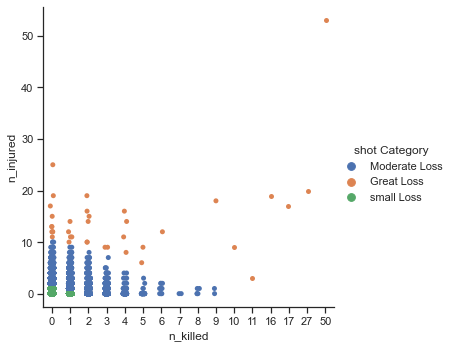

In [25]:
# creating a categorical plot crossing the number killed with number injured
sns.set(style='ticks')
g = sns.catplot(x='n_killed', y='n_injured', hue = 'shot Category', data = df)

In [26]:
# Saving output
# fig = g.get_figure()
g.savefig("out.png") 

In [27]:
# creating weekday_flag
result = []

for value in df["weekday"]:
  if value == 0:
    result.append("Sundays")
  elif value == 1:
    result.append("Mondays")
  elif value == 2:
    result.append("Tuesdays")
  elif value ==3:
    result.append("Wednesdays")
  elif value == 4:
    result.append("Thursdays")
  elif value == 5:
    result.append("Fridays")
  else:
    result.append("Saturdays")

In [28]:
df['weekday_names']=result

In [29]:
result

['Mondays',
 'Mondays',
 'Mondays',
 'Fridays',
 'Sundays',
 'Sundays',
 'Fridays',
 'Sundays',
 'Sundays',
 'Tuesdays',
 'Tuesdays',
 'Thursdays',
 'Fridays',
 'Fridays',
 'Fridays',
 'Fridays',
 'Saturdays',
 'Wednesdays',
 'Fridays',
 'Sundays',
 'Sundays',
 'Mondays',
 'Mondays',
 'Wednesdays',
 'Thursdays',
 'Fridays',
 'Saturdays',
 'Fridays',
 'Saturdays',
 'Saturdays',
 'Sundays',
 'Mondays',
 'Wednesdays',
 'Saturdays',
 'Sundays',
 'Tuesdays',
 'Tuesdays',
 'Wednesdays',
 'Fridays',
 'Saturdays',
 'Saturdays',
 'Wednesdays',
 'Wednesdays',
 'Thursdays',
 'Fridays',
 'Saturdays',
 'Fridays',
 'Saturdays',
 'Saturdays',
 'Mondays',
 'Tuesdays',
 'Saturdays',
 'Saturdays',
 'Wednesdays',
 'Saturdays',
 'Sundays',
 'Sundays',
 'Tuesdays',
 'Wednesdays',
 'Fridays',
 'Saturdays',
 'Saturdays',
 'Saturdays',
 'Wednesdays',
 'Wednesdays',
 'Fridays',
 'Saturdays',
 'Sundays',
 'Thursdays',
 'Fridays',
 'Fridays',
 'Fridays',
 'Saturdays',
 'Saturdays',
 'Sundays',
 'Mondays',
 'Tues

In [30]:
df['weekday_names'].value_counts(dropna=False)

Saturdays     37052
Fridays       36096
Tuesdays      34126
Sundays       33760
Mondays       33307
Thursdays     32775
Wednesdays    32561
Name: weekday_names, dtype: int64

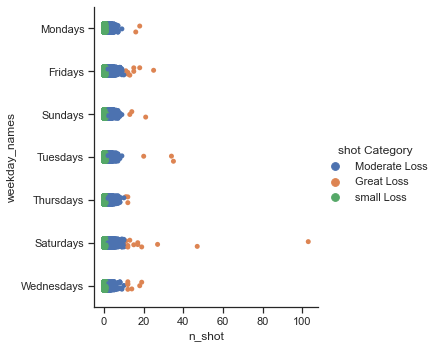

In [31]:
# creating a categorical plot crossing the number killed with number injured
sns.set(style='ticks')
g = sns.catplot(x='n_shot', y='weekday_names', hue = 'shot Category', data = df)

### 4. Questions and Answers

Question: 
- Is gun violence higher on weekdays or weekends?
- What is the highest number of people shot in the US. Gun violence incidents?

- The number of people injured in a gun violence incident for great loss category is is between 10 and 30 apart from the outlier which is above 50. While for number of people killed, it is between 10 and above but we have fewer incident of great loss category when it comes to number of people killed by gun shot than people injured by gun shot

- There are more gun violence incidents where people are shot on saturday,followed by Friday. There are no much very big difference for the rest of the days when compared with Saturday and Friday.


### 5. Hypothesis

If more people are shot, then there will be an increase in the no of people who died of gun shot.

### 6. Exporting data

In [32]:
# Export data

df.to_pickle(os.path.join(path, '02-Data','Prepared data', 'gun_violence_updated_clean.pkl'))